# Diffusion, Fast

[Stability AI Image Models](https://stability.ai/stable-image)

[Accelerating Generative AI Part III: Diffusion, Fast](https://pytorch.org/blog/accelerating-generative-ai-3/?hss_channel=lcp-78618366) by Sayak Paul and Patrick von Platen (Hugging Face)

[Diffusion, fast GitHub repo](https://github.com/huggingface/diffusion-fast)

## Setup

In [1]:
# Import packages
import torch
from diffusers import StableDiffusionXLPipeline

In [2]:
# Verify Metal Performance Shaders (MPS) support
if torch.backends.mps.is_available():
    mps_device = torch.device('mps')
    x = torch.ones(1, device=mps_device)
    print(x)
else:
    print('MPS device not found.')

tensor([1.], device='mps:0')


## Run Inference Using a Reduced Precision

In [3]:
# Load the pipeline in float16 precision and place its model components on MPS.
pipe = StableDiffusionXLPipeline.from_pretrained('stabilityai/stable-diffusion-xl-base-1.0', torch_dtype=torch.float16).to('mps')

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

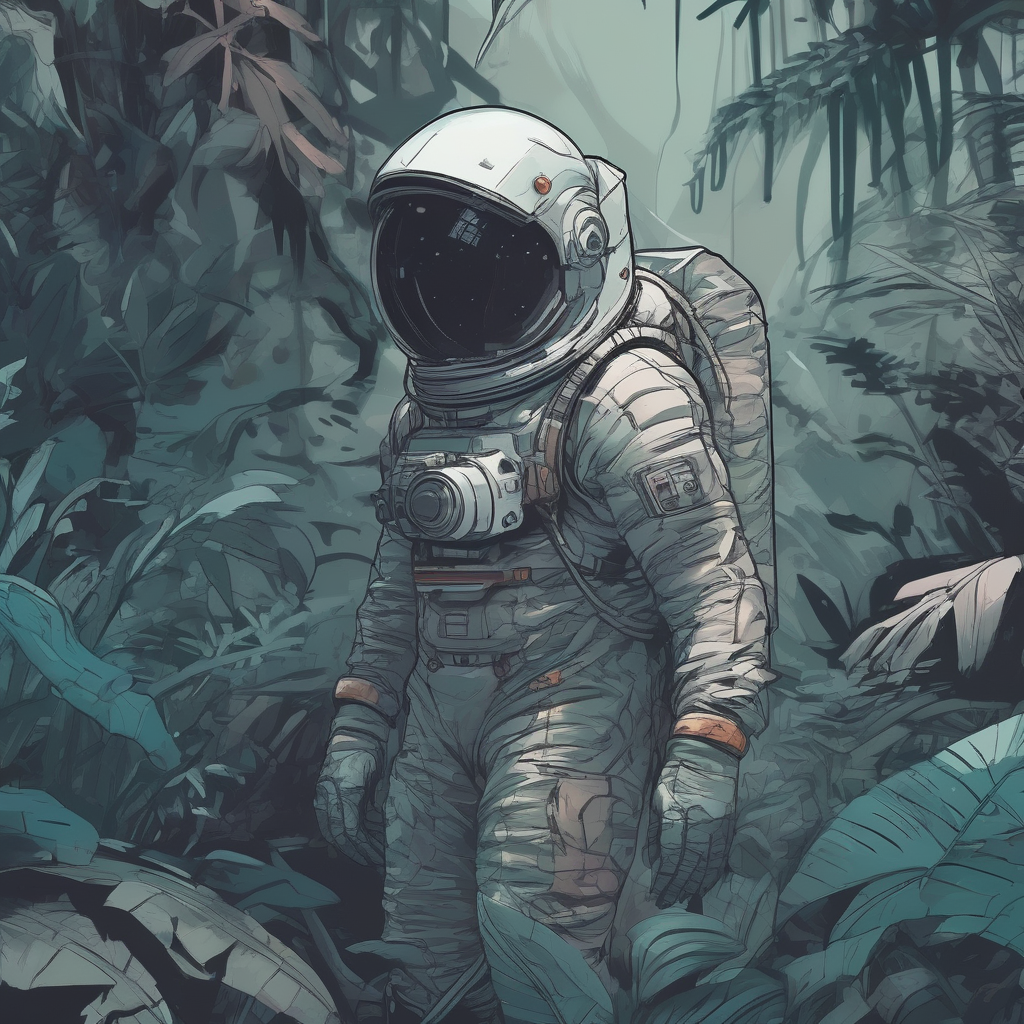

In [4]:
# Pass a text prompt
prompt = 'Astronaut in a jungle, cold color palette, muted colors, detailed, 8k'

# Generate image
image = pipe(prompt, num_inference_steps=30).images[0]

# Display image
image